## problem statement:
**create a model that can predict survival rate in a ship taking into consideration factors sorrounding passengers aboard the Titanic.**


In [126]:
#importing Libraries
import pandas as pd
import numpy as np

In [156]:
df = pd.read_csv(r'C:\Users\Gideon Kipkorir\Desktop\colab\Datasets\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Cleanning the dataset**

In [157]:
#droping the 'Name' and 'PassengerId' columns since names and passengerid do not play a role in their survival
df.drop(columns = ['Name','PassengerId' ],axis = 1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [158]:

df.shape

(891, 10)

In [159]:
#checking for missing values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [160]:
#droping 'Cabin' colun because it has many missing values
df.drop(['Cabin'],1, inplace = True)


In [161]:
#Filling missing values for age with the mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
#dropping any missin g value
df = df.dropna()

In [162]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [163]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [164]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [165]:
#we will drop 'Tickets' will de dropped , because Tickets are a representation of fare and class.Besides, the ticket column has many duplicates

print('no. of unique values:',len(df.Ticket.unique()))
print('no. of rows: ', df.Ticket.count())

#dropping Ticket

df =df.drop(['Ticket'],1)

no. of unique values: 680
no. of rows:  889


The **age** feature has outliers, however since the outliers seam to be reasonable by refelceting the distribution of ages of the passengers, who range from babies to the elderly. The sibso, also appears to be reasonable since members of an since we can have as much as 8 siblings-or-spouses relationships in the Titanic, the same rationale applies to pasenges with parent/children relationship aboard the Titanic.As well have outliers becauses the reflect different classes which seem to be reasonable.

In [167]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Exploratory Data Analysis

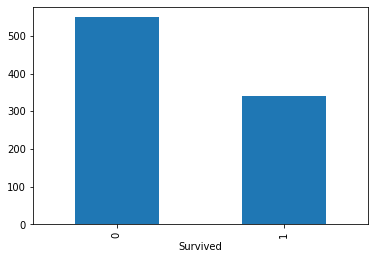

In [169]:
df.groupby(['Survived'])['Sex'].count().plot(kind = 'bar')

In [151]:
#label encoding categorical data
df['Age'] = df['Age'].astype(int)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.dtypes[titanic_df.dtypes == 'object'].index
df[['Sex', 'Embarked']] = df[['Sex',  'Embarked']].apply(le.fit_transform)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


In [ ]:
#checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt
col_names = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']
fig, ax = plt.subplots(len(col_names), figsize=(20,10))

for i, col_val in enumerate(col_names):
    sns.boxplot(titanic_df[col_val], ax=ax[i])
#     ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
#     ax[i].set_xlabel(col_val, fontsize=8)
#     ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

In [70]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.498313,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,12.979638,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


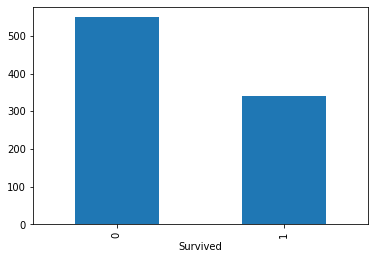

In [141]:
# sns.scatterplot(y ='Age', x= 'Survived', data =titanic_df  )


Turns out there were more 

**Multivariate analysis**

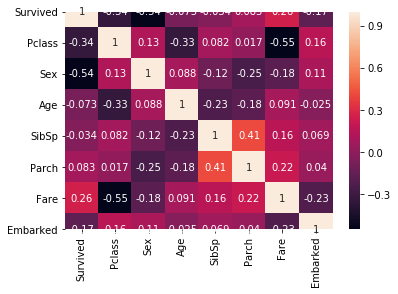

In [142]:
#correlation
sns.heatmap(df.corr(),annot = True)

 There is a moderate positive correlation between sex and survival and a moderat epositive correlation between survival and passenger class.

##  Modelling with KNN
Baseline Model

In [143]:
y = df.Survived.values
x = df.drop(['Survived'],1).values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state =50)

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn_model1 = knn.fit(x_train,y_train)

In [145]:
#making prediction using our model
y_pred = knn.predict(x_test)

In [146]:
#Measuring accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.6966292134831461


**An optimized model**

In [147]:
#standardize the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)#KNN algorithm performs better with standardized data.


In [148]:
#hyper-parameter tune our model to improve accuracy. We will use the grid search.
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights':['uniform', 'distance'], 'algorithm':['ball_tree', 'kd_tree', 'brute'] }
knn_m = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, cv = 10 ,n_jobs= 1, verbose  = 0)
print('best parameters:', knn_m.fit(x_train,y_train))

best parameters: GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


C:\Users\Gideon Kipkorir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [149]:
#fittting our model with the best parameters
knn_model = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', leaf_size = 30,metric='minkowski',weights='uniform' )
knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [150]:
#predictin with model.
y_pred = knn_model.predict(x_test)

#assessing the accuracy of the model
print('accuracy:', accuracy_score(y_test, y_pred))


accuracy: 0.8258426966292135


## SPAM classification using Naive Bayes model

In [80]:
#loading the dataset
spams = pd.read_csv('spambase.data',header = None, names = ['message', 'label'])
spams.head()

message  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.64 0.00 0.00 0.00 0.32 0.00 1.29 1.93 0.00 0.96 0.0 0.00 0.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.000 0.0 0.778 0.000 0.000 3.756 61       278   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00 0.94 0.21 0.79 0.65 0.21 0.14 0.14 0.07 0.28 3.47 0.00 1.59 0.0 0.43 0.43 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.07 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.132 0.0 0.372 0.180 0.048 5.114 101     1028   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12 0.00 1.75 0.06 0.06 1.03 1.36 0.32 0.51 0.0 1.16 0.06 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.06 0.0 0.0 0.12 0.0 0.06 0.06 0.0 0.0 0.01 0.143 0.0 0.276 0.184 0.010 9.821 485     2259   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31 0.63 0.31 0.31 0.31 0.00 0.00 0.31 0.00 0.00 3.18 0.00 0.31 0.0 0.00 0.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.137 0.0 0.137 0.000 0.000 3.537 40       191   
                                                                                                                                                                                                                                0.135 0.0 0.135 0.000 0.000 3.537 40       191   

                                                                                                                                                                                                                                                                       label  
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.64 0.00 0.00 0.00 0.32 0.00 1.29 1.93 0.00 0.96 0.0 0.00 0.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.000 0.0 0.778 0.000 0.000 3.756 61       1  
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00 0.94 0.21 0.79 0.65 0.21 0.14 0.14 0.07 0.28 3.47 0.00 1.59 0.0 0.43 0.43 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.07 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.132 0.0 0.372 0.180 0.048 5.114 101      1  
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12 0.00 1.75 0.06 0.06 1.03 1.36 0.32 0.51 0.0 1.16 0.06 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.06 0.0 0.0 0.12 0.0 0.06 0.06 0.0 0.0 0.01 0.143 0.0 0.276 0.184 0.010 9.821 485      1  
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31 0.63 0.31 0.31 0.31 0.00 0.00 0.31 0.00 0.00 3.18 0.00 0.31 0.0 0.00 0.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.137 0.0 0.137 0.000 0.000 3.537 40       1  
                                                                                                                                                                                                                                0.135 0.0 0.135 0.000 0.000 3.537 40       1

In [81]:
x = spams['message'].values
y = spams['label'].values
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state =15) 

In [83]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
#fiting the model
mnb = mnb.fit(x_train,y_train)
#using the model to make prediction
y_pred = mnb.predict(x_test)
#measuring accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy: 0.6167209554831705
[[568   0]
 [353   0]]


C:\Users\Gideon Kipkorir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
#with 70-30 ratio split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state =15) 

In [85]:
mnb = MultinomialNB()
#fiting the model
mnb = mnb.fit(x_train,y_train)
#using the model to make prediction
y_pred = mnb.predict(x_test)
#measuring accuracy

print('accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy: 0.6198406951484432
[[856   0]
 [525   0]]


C:\Users\Gideon Kipkorir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
#with 60-40 ratio split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.4, random_state =15) 

In [87]:
mnb = MultinomialNB()
#fiting the model
mnb = mnb.fit(x_train,y_train)
#using the model to make prediction
y_pred = mnb.predict(x_test)
#measuring accuracy

print('accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy: 0.6224877783813145
[[1146    0]
 [ 695    0]]


C:\Users\Gideon Kipkorir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Observation: increasing the test dataset while at the same time decreasing the improves the accuracy of the model.